In [1]:
import xarray as _xr
import numpy as _np
import geopandas as _gpd
import pandas as _pd
import xagg as _xa
import gc
import copy
import rioxarray


ERROR 1: PROJ: proj_create_from_database: Open of /net/home/dchinthaparthy/.conda/envs/agg_env/share/proj failed


In [2]:
try:
    from dea_tools.spatial import xr_vectorize
except ImportError:
    from dea_tools.spatial import xr_vectorize

In [3]:
import src.read_data as data
    
clim_data = data.climate_data()
landcover_data = data.landcover_data()
gaul_events = data.disaster_gaul_data()
world_map = data.world_map_data()
lat_array = data.lat_weights_data()

In [9]:
type(clim_data)


xarray.core.dataset.Dataset

In [10]:
type(landcover_data)

xarray.core.dataset.Dataset

In [11]:
type(gaul_events)

geopandas.geodataframe.GeoDataFrame

In [12]:
type(world_map)

geopandas.geodataframe.GeoDataFrame

In [13]:
type(lat_array)

xarray.core.dataarray.DataArray

In [16]:
print(landcover_data)

<xarray.Dataset>
Dimensions:      (band: 31, y: 6480, x: 12960)
Coordinates:
  * band         (band) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
    spatial_ref  int64 ...
  * x            (x) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * y            (y) float64 90.0 89.97 89.94 89.92 ... -89.92 -89.95 -89.97
Data variables:
    band_data    (band, y, x) float32 dask.array<chunksize=(2, 405, 1620), meta=np.ndarray>


In [20]:
# Accessing the dataset for the year 2018 at latitude 0 and longitude 0
dataset_2018_lat0_long0 = landcover_data.sel(band=2018, x=0.0, y=0.0, method='nearest')
print(dataset_2018_lat0_long0)


<xarray.Dataset>
Dimensions:      ()
Coordinates:
    band         int64 2018
    spatial_ref  int64 ...
    x            float64 0.001389
    y            float64 -0.001389
Data variables:
    band_data    float32 dask.array<chunksize=(), meta=np.ndarray>


In [23]:
# Accessing the band data and computing the values
band_data_value = dataset_2018_lat0_long0['band_data'].compute()
print(band_data_value)


<xarray.DataArray 'band_data' ()>
array(4., dtype=float32)
Coordinates:
    band         int64 2018
    spatial_ref  int64 0
    x            float64 0.001389
    y            float64 -0.001389


In [6]:
# Filter the DataFrame for rows where the 'country' is 'Kuwait'
kuwait_events = gaul_events[gaul_events['country'] == 'Kuwait']

# Extract the 'Dis No' values (the index of the filtered DataFrame)
kuwait_dis_no = kuwait_events.index

# Print the 'Dis No' values for events related to Kuwait
print(kuwait_dis_no)






Index(['1997-0276-KWT'], dtype='object', name='Dis No')


In [7]:
dis_no_series = gaul_events.index

# Extracting the third part (country code) from each 'Dis No'
country_codes = [dis.split("-")[2] for dis in dis_no_series]

# Getting the unique set of country codes
unique_country_codes = set(country_codes)

print(unique_country_codes)

{'TTO', 'MNE', 'SRB', 'HTI', 'KNA', 'GEO', 'GUM', 'ATG', 'PRK', 'AZE', 'TZA', 'YEM', 'TWN', 'NOR', 'LBN', 'KGZ', 'VGB', 'MEX', 'NLD', 'SSD', 'SYC', 'GUF', 'CZE', 'TGO', 'LBR', 'GMB', 'ARM', 'VUT', 'TKM', 'PSE', 'IRN', 'MDG', 'SYR', 'USA', 'PER', 'MUS', 'BRB', 'NAM', 'ASM', 'CYP', 'COK', 'ARE', 'MHL', 'CRI', 'NPL', 'NZL', 'IRL', 'IND', 'TUV', 'BOL', 'SWE', 'SLV', 'BGR', 'GRC', 'PAK', 'MOZ', 'RWA', 'PNG', 'FSM', 'URY', 'IDN', 'DJI', 'CMR', 'AGO', 'DEU', 'HRV', 'CIV', 'SUR', 'GHA', 'LAO', 'BTN', 'REU', 'OMN', 'ISL', 'MRT', 'ISR', 'CHE', 'NGA', 'MAC', 'CHL', 'BLR', 'NCL', 'SOM', 'PYF', 'NER', 'BMU', 'MNG', 'ALB', 'FRA', 'SLE', 'MKD', 'GUY', 'VIR', 'CHN', 'BFA', 'HUN', 'JPN', 'QAT', 'ZWE', 'IRQ', 'DNK', 'COG', 'DMA', 'PRI', 'TKL', 'MMR', 'CAF', 'FJI', 'BEN', 'VEN', 'ZMB', 'MDA', 'LSO', 'TCD', 'MDV', 'HND', 'GNB', 'NIU', 'UKR', 'DOM', 'AFG', 'AUT', 'TLS', 'MYS', 'COL', 'PAN', 'SDN', 'BHS', 'LKA', 'THA', 'PRY', 'GBR', 'UZB', 'LBY', 'BRA', 'JOR', 'BLZ', 'SPI', 'SAU', 'GLP', 'TCA', 'SEN', 'SCG'

In [19]:
country_counts = gaul_events['country'].value_counts()

print(country_counts)

China                       737
United States of America    735
India                       462
Philippines                 405
Indonesia                   367
                           ... 
Niue                          1
Bermuda                       1
Laos                          1
Kuwait                        1
Qatar                         1
Name: country, Length: 217, dtype: int64


In [10]:
unique_countries = gaul_events.country.unique()
print(unique_countries)


['Sri Lanka' 'Tunisia' 'Samoa' 'France' 'Indonesia' 'Tokelau' 'Tonga'
 'Philippines' 'Tuvalu' 'Paraguay' 'United Republic of Tanzania' 'India'
 'Romania' 'Turkey' 'China' 'Peru' 'Sudan' 'Uganda'
 'Iran, Islamic Republic of' 'Viet Nam' 'United States of America'
 'Korea, Republic of' 'Australia' 'Bangladesh' 'Italy'
 'Congo, The Democratic Republic of the' 'Honduras' 'Fiji' 'Japan'
 'Greece' 'Costa Rica' 'Pakistan' 'Vanuatu' 'United Kingdom' 'Nicaragua'
 'Kenya' 'Ecuador' 'Iran' 'South Africa' 'Mexico' 'Nepal' 'Thailand'
 'Brazil' 'Ethiopia' 'Mongolia' 'Argentina' 'Chile' 'Colombia'
 'Tajikistan' 'Myanmar' 'Afghanistan' 'Guatemala' 'Malawi'
 'Papua New Guinea' 'Egypt' 'Panama' 'Uruguay' 'Georgia' 'Mauritius'
 'Jamaica' 'Dominican Republic' 'Benin' 'Ghana' 'Comoros' 'Cambodia'
 'Iraq' 'Cameroon' 'Austria' 'Jordan' 'Madagascar' 'Canada' 'Yemen'
 'New Zealand' "Lao People's Democratic Republic" 'Mauritania'
 'Puerto Rico' 'Lebanon' 'Algeria' 'Cuba' 'Bolivia'
 'Congo, the Democratic Republi

In [5]:
x = gaul_events.index

In [6]:
print(x)

Index(['1990-0001-LKA', '1990-0002-TUN', '1990-0003-WSM', '1990-0004-FRA',
       '1990-0005-IDN', '1990-0006-TKL', '1990-0008-TON', '1990-0009-PHL',
       '1990-0010-TUV', '1990-0011-PRY',
       ...
       '2020-0595-AUS', '2020-0597-TUR', '2020-0602-MNG', '2020-0604-ZMB',
       '2020-0606-CPV', '2020-9206-AGO', '2020-9424-MDG', '2020-9538-MRT',
       '2020-9582-BRA', '2020-9585-USA'],
      dtype='object', name='Dis No', length=9396)


In [3]:
event_shape = gaul_events[gaul_events.index == '1997-0276-KWT']

In [24]:
event_shape.to_csv('event_shape.csv', index=True)


In [ ]:
t

In [23]:
print(event_shape)

              disaster_number disaster_number_country  event_poly_id country  \
Dis No                                                                         
1997-0276-KWT       1997-0276           1997-0276-KWT              1  Kuwait   

                 official_name  iso adm1_code  adm1_name adm2_code adm2_name  \
Dis No                                                                         
1997-0276-KWT  State of Kuwait  KWT      None  Al Jahrah      None      None   

               ...           start_date             end_date event_duration  \
Dis No         ...                                                            
1997-0276-KWT  ...  1997-11-12T00:00:00  1997-11-12T00:00:00              1   

              duration_source start_aggregation end_aggregation start_day  \
Dis No                                                                      
1997-0276-KWT           emdat        1994-11-13      2000-11-11         0   

              end_day geo_source  \
Dis No      

In [25]:
event_shape.columns

Index(['disaster_number', 'disaster_number_country', 'event_poly_id',
       'country', 'official_name', 'iso', 'adm1_code', 'adm1_name',
       'adm2_code', 'adm2_name', 'disaster_group', 'disaster_subgroup',
       'disaster_type', 'disaster_subtype', 'disaster_subsubtype',
       'associated_disaster', 'associated_disaster2', 'event_name', 'region',
       'continent', 'river_basin', 'location', 'ofda_response', 'appeal',
       'declaration', 'aid_contribution', 'magnitude_value', 'magnitude_scale',
       'local_time', 'total_deaths', 'number_injured', 'number_affected',
       'number_homeless', 'total_affected', 'total_damages',
       'total_damages_adjusted', 'insured_damages', 'insured_damages_adjusted',
       'geolocation', 'year', 'administrative_level', 'start_date', 'end_date',
       'event_duration', 'duration_source', 'start_aggregation',
       'end_aggregation', 'start_day', 'end_day', 'geo_source', 'geometry'],
      dtype='object')

In [26]:
event_year = int(event_shape.year.values[0])


In [27]:
event_year

1997

In [28]:
event_shape.total_bounds

array([46.55061722, 28.99112511, 48.44319534, 30.08388138])

In [29]:
landcover = data.landcover_data()

In [30]:

event_year = int(event_shape.year.values[0])
xmin, ymin, xmax, ymax = event_shape.total_bounds

In [31]:
landcover_data_cropped = landcover.sel(x=slice(xmin, xmax), 
                                            y=slice(ymax,ymin), band = event_year)

In [32]:
print(landcover_data_cropped)

<xarray.Dataset>
Dimensions:      (y: 40, x: 68)
Coordinates:
    band         int64 1997
    spatial_ref  int64 ...
  * x            (x) float64 46.56 46.58 46.61 46.64 ... 48.33 48.36 48.39 48.42
  * y            (y) float64 30.08 30.05 30.03 30.0 ... 29.08 29.05 29.03 29.0
Data variables:
    band_data    (y, x) float32 dask.array<chunksize=(40, 68), meta=np.ndarray>


In [33]:
  landcover_data_cropped = landcover.sel(x=slice(xmin, xmax), 
                                            y=slice(ymax,ymin), band = event_year).drop('band')

In [34]:
landcover_data_cropped

<xarray.Dataset>
Dimensions:      (y: 40, x: 68)
Coordinates:
    spatial_ref  int64 ...
  * x            (x) float64 46.56 46.58 46.61 46.64 ... 48.33 48.36 48.39 48.42
  * y            (y) float64 30.08 30.05 30.03 30.0 ... 29.08 29.05 29.03 29.0
Data variables:
    band_data    (y, x) float32 dask.array<chunksize=(40, 68), meta=np.ndarray>

In [35]:
landcover_data_cropped1 = landcover_data_cropped.band_data

In [36]:
print(landcover_data_cropped1)

<xarray.DataArray 'band_data' (y: 40, x: 68)>
dask.array<getitem, shape=(40, 68), dtype=float32, chunksize=(40, 68), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 ...
  * x            (x) float64 46.56 46.58 46.61 46.64 ... 48.33 48.36 48.39 48.42
  * y            (y) float64 30.08 30.05 30.03 30.0 ... 29.08 29.05 29.03 29.0


In [37]:
    landcover_data_cropped = landcover_data_cropped.compute()


In [38]:
print(landcover_data_cropped.band_data)

<xarray.DataArray 'band_data' (y: 40, x: 68)>
array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 2.],
       ...,
       [5., 3., 5., ..., 4., 4., 4.],
       [5., 5., 5., ..., 4., 4., 4.],
       [3., 5., 5., ..., 4., 4., 4.]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 46.56 46.58 46.61 46.64 ... 48.33 48.36 48.39 48.42
  * y            (y) float64 30.08 30.05 30.03 30.0 ... 29.08 29.05 29.03 29.0


In [39]:
landcover_data_cropped.rio.write_crs("EPSG:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (y: 40, x: 68)
Coordinates:
  * x            (x) float64 46.56 46.58 46.61 46.64 ... 48.33 48.36 48.39 48.42
  * y            (y) float64 30.08 30.05 30.03 30.0 ... 29.08 29.05 29.03 29.0
    spatial_ref  int64 0
Data variables:
    band_data    (y, x) float32 5.0 5.0 5.0 5.0 5.0 5.0 ... 4.0 4.0 4.0 4.0 4.0

In [46]:
 try:
        landcover_data_clipped = landcover_data_cropped.rio.clip(event_shape.geometry.values, gaul_events.crs, all_touched=True)
    except:
        landcover_data_clipped = None

IndentationError: unindent does not match any outer indentation level (<string>, line 3)

In [40]:
event_shape.geometry.values

<GeometryArray>
Length: 1, dtype: geometry

In [41]:
gaul_events.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
import geopandas as gpd

# Assuming event_shape.geometry.values gives you an array of geometry objects
geometries = event_shape.geometry.values

# Create a GeoDataFrame from these geometries
gdf = gpd.GeoDataFrame(geometry=geometries)

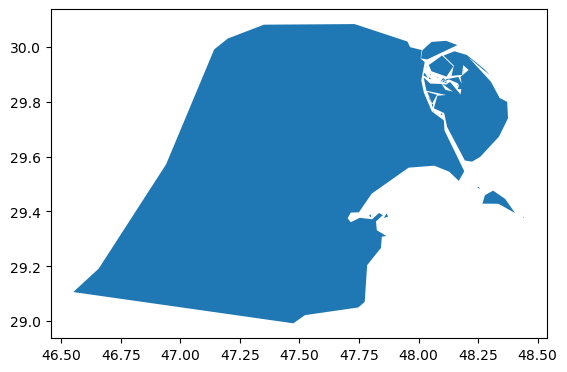

In [43]:
import matplotlib.pyplot as plt


gdf.plot()

plt.show()

In [14]:
def get_land_cover_data(event_id):
    
    landcover = data.landcover_data()
    
    event_shape = gaul_events[gaul_events.index == event_id]
    event_year = int(event_shape.year.values[0])
    xmin, ymin, xmax, ymax = event_shape.total_bounds
    
    
    landcover_data_cropped = landcover.sel(x=slice(xmin, xmax), 
                                            y=slice(ymax,ymin), band = event_year).drop('band')
    
    landcover_data_cropped = landcover_data_cropped.band_data
    landcover_data_cropped = landcover_data_cropped.compute()
    landcover_data_cropped.rio.write_crs("EPSG:4326", inplace=True)
    
    try:
        landcover_data_clipped = landcover_data_cropped.rio.clip(event_shape.geometry.values, gaul_events.crs, all_touched=True)
    except:
        landcover_data_clipped = None
    
    lc_pixels = {}
    for i in range(1,4):
        try:
            lc_pixels[i] = xr_vectorize(landcover_data_clipped.where(landcover_data_clipped == i),
                   crs=landcover_data_clipped.rio.crs,
                   transform=landcover_data_clipped.rio.transform(),
                   mask=landcover_data_clipped.values == i).dissolve()
        except:
            lc_pixels[i] = _gpd.GeoDataFrame(columns=["geometry","attribute"], crs="EPSG:4326", geometry="geometry")
    
    event_shape_urban = event_shape.copy()
    event_shape_croplands = event_shape.copy()
    event_shape_natural = event_shape.copy()
    
       
    if lc_pixels[1].empty:
        event_shape_urban = _gpd.GeoDataFrame(columns=["geometry","attribute"], crs="EPSG:4326", geometry="geometry")
    else:
        event_shape_urban["geometry"] = lc_pixels[1]["geometry"].values
    
    if lc_pixels[2].empty:
        event_shape_croplands = _gpd.GeoDataFrame(columns=["geometry","attribute"], crs="EPSG:4326", geometry="geometry")
    else:
        event_shape_croplands["geometry"] = lc_pixels[2]["geometry"].values
    
    if lc_pixels[3].empty:
        event_shape_natural = _gpd.GeoDataFrame(columns=["geometry","attribute"], crs="EPSG:4326", geometry="geometry")
    else:
        event_shape_natural["geometry"] = lc_pixels[3]["geometry"].values
    
    return(event_shape_urban, event_shape_croplands, event_shape_natural)

In [15]:
get_land_cover_data('1997-0276-KWT')

(              disaster_number disaster_number_country  event_poly_id country  \
 Dis No                                                                         
 1997-0276-KWT       1997-0276           1997-0276-KWT              1  Kuwait   
 
                  official_name  iso adm1_code  adm1_name adm2_code adm2_name  \
 Dis No                                                                         
 1997-0276-KWT  State of Kuwait  KWT      None  Al Jahrah      None      None   
 
                ...           start_date             end_date event_duration  \
 Dis No         ...                                                            
 1997-0276-KWT  ...  1997-11-12T00:00:00  1997-11-12T00:00:00              1   
 
               duration_source start_aggregation end_aggregation start_day  \
 Dis No                                                                      
 1997-0276-KWT           emdat        1994-11-13      2000-11-11         0   
 
               end_day geo_sourc

In [ ]:
def get_events_country(iso_code):
    iso_events = gaul_events[gaul_events.iso == iso_code]
    iso_map = world_map[world_map.index == iso_code]
    
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    
    return(iso_events, iso_map,latitude_weights_country)

In [60]:
gaul_events.iso

Dis No
1990-0001-LKA    LKA
1990-0002-TUN    TUN
1990-0003-WSM    WSM
1990-0004-FRA    FRA
1990-0005-IDN    IDN
                ... 
2020-9206-AGO    AGO
2020-9424-MDG    MDG
2020-9538-MRT    MRT
2020-9582-BRA    BRA
2020-9585-USA    USA
Name: iso, Length: 9396, dtype: object

In [64]:
iso_events = gaul_events[gaul_events.iso == 'IDN']
iso_map = world_map[world_map.index == 'IDN']

In [69]:
print(iso_map)

      ADM0_NAME ADM0_CODE DISP_AREA EXP0_YEAR        STATUS STR0_YEAR  \
iso3                                                                    
IDN   Indonesia       116        NO      3000  Member State      1000   

      Shape_Area  Shape_Leng          official_name  \
iso3                                                  
IDN   153.794891  722.016234  Republic of Indonesia   

                                               geometry  
iso3                                                     
IDN   MULTIPOLYGON (((100.64657 -3.48178, 100.64654 ...  


In [70]:
def get_events_country(iso_code):
    iso_events = gaul_events[gaul_events.iso == iso_code]
    iso_map = world_map[world_map.index == iso_code]
    
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    
    return(iso_events, iso_map,latitude_weights_country)

In [72]:
get_events_country('IDN')

(              disaster_number disaster_number_country  event_poly_id  \
 Dis No                                                                 
 1990-0005-IDN       1990-0005           1990-0005-IDN              9   
 1990-0012-IDN       1990-0012           1990-0012-IDN              1   
 1990-0593-IDN       1990-0593           1990-0593-IDN              3   
 1990-0702-IDN       1990-0702           1990-0702-IDN              1   
 1990-0709-IDN       1990-0709           1990-0709-IDN              2   
 ...                       ...                     ...            ...   
 2020-0517-IDN       2020-0517           2020-0517-IDN              1   
 2020-0518-IDN       2020-0518           2020-0518-IDN              1   
 2020-0532-IDN       2020-0532           2020-0532-IDN              2   
 2020-0544-IDN       2020-0544           2020-0544-IDN              3   
 2020-0551-IDN       2020-0551           2020-0551-IDN              2   
 
                  country          official_name 

In [74]:
xmin, ymin, xmax, ymax = iso_map.bounds.loc['IDN']
latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))

In [75]:
print(latitude_weights_country)

<xarray.DataArray (latitude: 68, longitude: 184)>
array([[0.99474757, 0.99474757, 0.99474757, ..., 0.99474757, 0.99474757,
        0.99474757],
       [0.99518473, 0.99518473, 0.99518473, ..., 0.99518473, 0.99518473,
        0.99518473],
       [0.99560293, 0.99560293, 0.99560293, ..., 0.99560293, 0.99560293,
        0.99560293],
       ...,
       [0.98365014, 0.98365014, 0.98365014, ..., 0.98365014, 0.98365014,
        0.98365014],
       [0.98285499, 0.98285499, 0.98285499, ..., 0.98285499, 0.98285499,
        0.98285499],
       [0.98204113, 0.98204113, 0.98204113, ..., 0.98204113, 0.98204113,
        0.98204113]])
Coordinates:
  * latitude   (latitude) float64 5.875 5.625 5.375 ... -10.38 -10.62 -10.88
  * longitude  (longitude) float64 95.12 95.38 95.62 95.88 ... 140.4 140.6 140.9


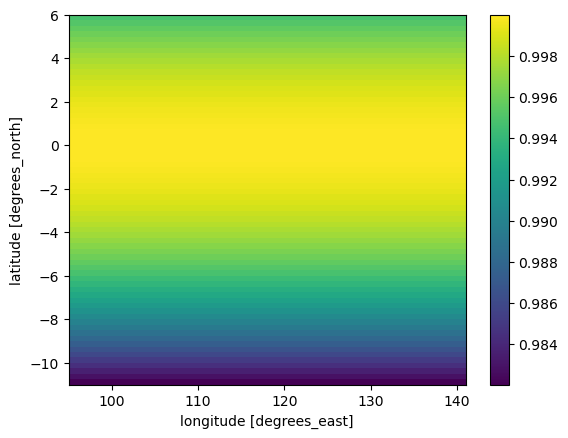

In [76]:
latitude_weights_country.plot()

In [ ]:
def get_clim_data(iso_code,units_str,i):
    iso_map = world_map[world_map.index == iso_code]
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    clim_data_country = clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin)).sel(units=units_str, drop=True)
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    clim_vars = list(clim_data_country.data_vars)
    clim_data_country_var = clim_data_country[[clim_vars[i]]]
    clim_data_country_mem = clim_data_country_var.compute()
    return(clim_data_country_mem)

In [77]:
world_map.index

Index(['AFG', 'nan', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG',
       ...
       'VUT', 'VEN', 'VNM', 'VIR', 'nan', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso3', length=268)

In [79]:
iso_map = world_map[world_map.index == 'IND']

In [81]:
iso_code = 'IND'

In [82]:
 xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]

In [83]:
print(xmin,xmax)

68.17821481235681 97.41077929279568


In [84]:
print(ymin,ymax)

6.75599735952168 37.08942022230965


In [85]:
clim_data_country = clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin)).sel(units=units_str, drop=True)
    

NameError: name 'units_str' is not defined

In [86]:
clim_data_country1= clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))

In [87]:
clim_data_country1.units

<xarray.DataArray 'units' (units: 3)>
array(['original', 'anomalies', 'zscored'], dtype='<U9')
Coordinates:
  * units    (units) <U9 'original' 'anomalies' 'zscored'

In [88]:
clim_data_country = clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin)).sel(units='original', drop=True)


In [89]:
latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))


In [90]:
print(latitude_weights_country)

<xarray.DataArray (latitude: 121, longitude: 117)>
array([[0.79994657, 0.79994657, 0.79994657, ..., 0.79994657, 0.79994657,
        0.79994657],
       [0.80255725, 0.80255725, 0.80255725, ..., 0.80255725, 0.80255725,
        0.80255725],
       [0.80515265, 0.80515265, 0.80515265, ..., 0.80515265, 0.80515265,
        0.80515265],
       ...,
       [0.99172727, 0.99172727, 0.99172727, ..., 0.99172727, 0.99172727,
        0.99172727],
       [0.99227791, 0.99227791, 0.99227791, ..., 0.99227791, 0.99227791,
        0.99227791],
       [0.99280967, 0.99280967, 0.99280967, ..., 0.99280967, 0.99280967,
        0.99280967]])
Coordinates:
  * latitude   (latitude) float64 36.88 36.62 36.38 36.12 ... 7.375 7.125 6.875
  * longitude  (longitude) float64 68.38 68.62 68.88 69.12 ... 96.88 97.12 97.38


In [91]:
clim_vars = list(clim_data_country.data_vars)

In [92]:
print(clim_vars)

['pet', 'pev', 't2m', 't2mmax', 't2mmin', 'tp', 'rh', 'sktmax', 'spmean', 'tccmean', 'tro', 'windgustmax', 'windgustmean', 'smsurf', 'spei_180', 'spei_30', 'spei_90']


In [93]:
    clim_data_country_var = clim_data_country[[clim_vars[3]]]
    clim_data_country_mem = clim_data_country_var.compute()

In [94]:
print(clim_data_country_mem)

<xarray.Dataset>
Dimensions:    (time: 12784, latitude: 121, longitude: 117)
Coordinates:
  * latitude   (latitude) float64 36.88 36.62 36.38 36.12 ... 7.375 7.125 6.875
  * longitude  (longitude) float64 68.38 68.62 68.88 69.12 ... 96.88 97.12 97.38
  * time       (time) datetime64[ns] 1987-01-01 1987-01-02 ... 2021-12-31
Data variables:
    t2mmax     (time, latitude, longitude) float32 11.82 12.07 ... 27.94 27.99
Attributes: (12/33)
    Conventions:                CF-1.9
    acknowledgment:             https://www.gleam.eu/
    add_offset:                 0.0
    contributor_name:           Remote Sensing Centre for Earth System Resear...
    contributor_url:            rsc4earth.de
    creator_name:               Remote Sensing Centre for Earth System Resear...
    ...                         ...
    temporal_resolution:        1D
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1980-01-01T00:00:00.000000000
    time_period:             

In [95]:
 clim_data_country_var = clim_data_country[[clim_vars[3]]]

In [96]:
print(clim_data_country_var)

<xarray.Dataset>
Dimensions:    (time: 12784, latitude: 121, longitude: 117)
Coordinates:
  * latitude   (latitude) float64 36.88 36.62 36.38 36.12 ... 7.375 7.125 6.875
  * longitude  (longitude) float64 68.38 68.62 68.88 69.12 ... 96.88 97.12 97.38
  * time       (time) datetime64[ns] 1987-01-01 1987-01-02 ... 2021-12-31
Data variables:
    t2mmax     (time, latitude, longitude) float32 dask.array<chunksize=(6392, 28, 27), meta=np.ndarray>
Attributes: (12/33)
    Conventions:                CF-1.9
    acknowledgment:             https://www.gleam.eu/
    add_offset:                 0.0
    contributor_name:           Remote Sensing Centre for Earth System Resear...
    contributor_url:            rsc4earth.de
    creator_name:               Remote Sensing Centre for Earth System Resear...
    ...                         ...
    temporal_resolution:        1D
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1980-01-01T00:00:00.000000000
   

In [97]:
clim_data_country_mem.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [52]:
def get_events_country(iso_code):
    iso_events = gaul_events[gaul_events.iso == iso_code]
    iso_map = world_map[world_map.index == iso_code]
    
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    
    return(iso_events, iso_map,latitude_weights_country)

In [53]:
def get_clim_data(iso_code,units_str,i):
    iso_map = world_map[world_map.index == iso_code]
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    clim_data_country = clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin)).sel(units=units_str, drop=True)
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    clim_vars = list(clim_data_country.data_vars)
    clim_data_country_var = clim_data_country[[clim_vars[i]]]
    clim_data_country_mem = clim_data_country_var.compute()
    return(clim_data_country_mem)

In [54]:
test_event, test_country,latitude_weights_country = get_events_country('KWT')

In [55]:
test_event

,disaster_number,disaster_number_country,event_poly_id,country,official_name,iso,adm1_code,adm1_name,adm2_code,adm2_name,...,start_date,end_date,event_duration,duration_source,start_aggregation,end_aggregation,start_day,end_day,geo_source,geometry
Dis No,,,,,,,,,,,,,,,,,,,,,
1997-0276-KWT,1997-0276,1997-0276-KWT,1,Kuwait,State of Kuwait,KWT,None,Al Jahrah,None,None,...,1997-11-12T00:00:00,1997-11-12T00:00:00,1,emdat,1994-11-13,2000-11-11,0,1,GDIS,"MULTIPOLYGON (((47.79319 29.38764, 47.80014 29..."


In [56]:
from multiprocessing.pool import ThreadPool
with ThreadPool(10) as p:
        out = p.map(get_land_cover_data,test_event.index)

In [57]:
    out_all = []
    out_urb = []
    out_crp = []
    out_nat = []
    
    for i in _np.arange(len(out)):
        out_all.append(test_event.iloc[[i]])
        out_urb.append(out[i][0])
        out_crp.append(out[i][1])
        out_nat.append(out[i][2])

In [58]:
print(out_all)

[              disaster_number disaster_number_country  event_poly_id country  \
Dis No                                                                         
1997-0276-KWT       1997-0276           1997-0276-KWT              1  Kuwait   

                 official_name  iso adm1_code  adm1_name adm2_code adm2_name  \
Dis No                                                                         
1997-0276-KWT  State of Kuwait  KWT      None  Al Jahrah      None      None   

               ...           start_date             end_date event_duration  \
Dis No         ...                                                            
1997-0276-KWT  ...  1997-11-12T00:00:00  1997-11-12T00:00:00              1   

              duration_source start_aggregation end_aggregation start_day  \
Dis No                                                                      
1997-0276-KWT           emdat        1994-11-13      2000-11-11         0   

              end_day geo_source  \
Dis No     

In [59]:
def calculate_px_overlap(event_geom):
        try:
            px_ov_all = _xa.pixel_overlaps(clim_data_cube_mem, event_geom,weights=latitude_weights_country,subset_bbox=False)
        except:
            px_ov_all = None
        return(px_ov_all)

In [60]:
def parallel_px_overlap(x):
        from multiprocess import Pool
        with Pool(30) as p:
            out = p.map(calculate_px_overlap, x)
        return(out)
    

In [61]:
px_ov_all = parallel_px_overlap(out_all)

In [62]:
px_ov_all

[None]

In [63]:
import src.read_data as data
import src.aggregation_functions as aggf
import pandas as pd

In [65]:
countries_events = aggf.aggregate_units_parallel("TUN")

creating polygons for each pixel...creating polygons for each pixel...

lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...
creating polygons for each pixel...creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.

lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...

lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...
creating polygons for each pixel...lat/lon bounds not found in dataset; they will be created.

lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...
creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output pol

In [66]:
print(countries_events)

<xarray.Dataset>
Dimensions:       (units: 3, landcover: 4, event: 10, time: 2191)
Coordinates:
  * units         (units) <U9 'zscored' 'original' 'anomalies'
  * landcover     (landcover) <U9 'all' 'urban' 'croplands' 'natural'
  * event         (event) <U13 '1990-0002-TUN' ... '2020-0440-TUN'
  * time          (time) int64 -1095 -1094 -1093 -1092 ... 1092 1093 1094 1095
Data variables: (12/17)
    pet           (units, landcover, event, time) float64 0.7186 0.5447 ... nan
    pev           (units, landcover, event, time) float64 0.5963 0.6968 ... nan
    rh            (units, landcover, event, time) float64 0.6654 0.7347 ... nan
    sktmax        (units, landcover, event, time) float64 -1.001 -0.7747 ... nan
    smsurf        (units, landcover, event, time) float64 1.175 1.109 ... nan
    spei_180      (units, landcover, event, time) float64 0.1096 0.1203 ... nan
    ...            ...
    t2mmin        (units, landcover, event, time) float64 -2.027 -0.7578 ... nan
    tccmean       

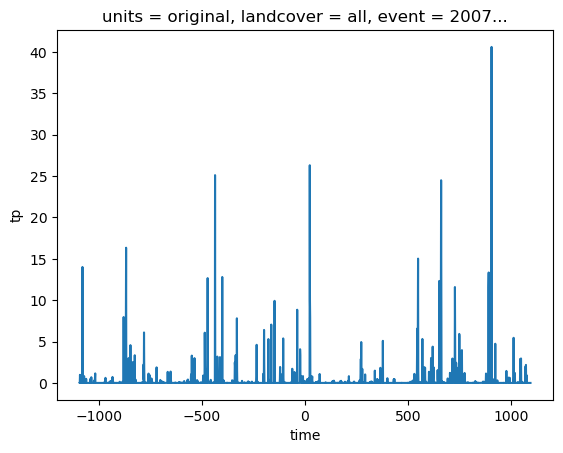

In [68]:
countries_events.isel(units=1,landcover=0,event=4).tp.plot()

In [9]:
def get_events_country(iso_code):
    iso_events = gaul_events[gaul_events.iso == iso_code]
    iso_map = world_map[world_map.index == iso_code]
    
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    
    return(iso_events, iso_map,latitude_weights_country)

In [10]:
def get_clim_data(iso_code,units_str,i):
    iso_map = world_map[world_map.index == iso_code]
    xmin, ymin, xmax, ymax = iso_map.bounds.loc[iso_code]
    clim_data_country = clim_data.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin)).sel(units=units_str, drop=True)
    latitude_weights_country = lat_array.sel(longitude=slice(xmin, xmax), latitude=slice(ymax, ymin))
    clim_vars = list(clim_data_country.data_vars)
    clim_data_country_var = clim_data_country[[clim_vars[i]]]
    clim_data_country_mem = clim_data_country_var.compute()
    return(clim_data_country_mem)

In [16]:
landcover_data = data.landcover_data()

In [18]:
def aggregate_units_parallel(iso_code):
    
    test_event, test_country,latitude_weights_country = get_events_country(iso_code)
    
    clim_data_cube_mem = get_clim_data(iso_code,'original',0)
    clim_data_cube_mem = clim_data_cube_mem.isel(time=0)
    
    def calculate_px_overlap(event_geom):
        try:
            px_ov_all = _xa.pixel_overlaps(clim_data_cube_mem, event_geom,weights=latitude_weights_country,subset_bbox=False)
        except:
            px_ov_all = None
        return(px_ov_all)
    
    
    def parallel_px_overlap(x):
        from multiprocess import Pool
        with Pool(30) as p:
            out = p.map(calculate_px_overlap, x)
        return(out)
    
    from multiprocessing.pool import ThreadPool
    with ThreadPool(10) as p:
        out = p.map(get_land_cover_data,test_event.index)
    #from multiprocess import Pool
    #with Pool(30) as p:
    #    out = p.map(get_land_cover_data, test_event.index)
    
    out_all = []
    out_urb = []
    out_crp = []
    out_nat = []
    
    for i in _np.arange(len(out)):
        out_all.append(test_event.iloc[[i]])
        out_urb.append(out[i][0])
        out_crp.append(out[i][1])
        out_nat.append(out[i][2])
        
    px_ov_all = parallel_px_overlap(out_all)
    px_ov_urb = parallel_px_overlap(out_urb)
    px_ov_crp = parallel_px_overlap(out_crp)
    px_ov_nat = parallel_px_overlap(out_nat)
    
    for i in _np.arange(len(px_ov_all)):
        px_ov_all[i].agg = px_ov_all[i].agg.iloc[:, :-1]
    
    for i in _np.arange(len(px_ov_urb)):
        try:
            px_ov_urb[i].agg = px_ov_urb[i].agg.iloc[:, :-1]
        except:
            pass
    
    for i in _np.arange(len(px_ov_crp)):
        try:
            px_ov_crp[i].agg = px_ov_crp[i].agg.iloc[:, :-1]
        except:
            pass
    
    for i in _np.arange(len(px_ov_nat)):
        try:
            px_ov_nat[i].agg = px_ov_nat[i].agg.iloc[:, :-1]
        except:
            pass
        
    del clim_data_cube_mem
    print('##########################################')
    print('##########################################')
    print('THIS PART SHOULD NOT BE REPEATED')
    print('##########################################')
    print('##########################################')
        
    dims_names = ['original', 'anomalies', 'zscored']
        
    def aggregate_parallel(iso_code,units_str):
        events = []
        for v in _np.arange(17):

            aggregated_all = []
            aggregated_urb = []
            aggregated_crp = []
            aggregated_nat = []

            px_all = copy.deepcopy(px_ov_all)
            px_urb = copy.deepcopy(px_ov_urb)
            px_crp = copy.deepcopy(px_ov_crp)
            px_nat = copy.deepcopy(px_ov_nat)

            px_all = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_all)]
            px_urb = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_urb)]
            px_crp = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_crp)]
            px_nat = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_nat)]

            clim_data_cube_mem = get_clim_data(iso_code,units_str,v)

            def aggregate_variable_parallel(px_ov_object):

                if isinstance(px_ov_object, int):
                    ccolumns = px_all[px_ov_object].agg.columns
                    t1 = px_all[px_ov_object].agg.start_aggregation[0]
                    t2 = px_all[px_ov_object].agg.end_aggregation[0]

                    empty_event = create_empty_event(ccolumns,t1,t2, list(clim_data_cube_mem.data_vars)[0])

                    px_agg_out = _xr.zeros_like(empty_event).where(_xr.zeros_like(empty_event) != 0.)
                else:
                    px_agg_out = _xa.aggregate(clim_data_cube_mem.sel(time = slice(px_ov_object.agg.start_aggregation[0], px_ov_object.agg.end_aggregation[0])), px_ov_object).to_dataset()
                return(px_agg_out)


            def parallel_agg(x):
                #from multiprocess import Pool
                #with Pool(6) as p:
                #    out = p.map(aggregate_variable_parallel, x)
                from multiprocessing.pool import ThreadPool
                with ThreadPool(10) as p:
                    out = p.map(aggregate_variable_parallel,x)
                return(out)

            aggregated_all = parallel_agg(px_all)
            aggregated_urb = parallel_agg(px_urb)
            aggregated_crp = parallel_agg(px_crp)
            aggregated_nat = parallel_agg(px_nat)
            
            # events.append([aggregated_all, aggregated_urb, aggregated_crp, aggregated_nat])


            #event_out = []
            for e in _np.arange(len(px_all)):
                event_out = []
                event_out.append(reshape_event_variable_landcover(_xr.concat([aggregated_all[e],aggregated_urb[e],
                               aggregated_crp[e], aggregated_nat[e]],dim='landcover'),units_str))

                event_out = _xr.combine_by_coords(event_out)
            #event_out.append(event_out)
                events.append(event_out)
            events.append(event_out)
        return(events)

    def aggregate_country(units_str):
        aggregated = aggregate_parallel(iso_code,units_str)
        return(aggregated)


    from multiprocess import Pool
    #with Pool(9) as p:
    #    res = p.map(aggregate_country, dims_names)
    from multiprocessing.pool import ThreadPool
    with ThreadPool(6) as p:
        res = p.map(aggregate_country,dims_names)
    
    country_events = _xr.combine_by_coords([_xr.combine_by_coords(res[0]),_xr.combine_by_coords(res[1]),_xr.combine_by_coords(res[2])])
    country_events = country_events.sortby("units",ascending=False)
    return(country_events)

In [19]:
countries_events = aggregate_units_parallel("TUN")

creating polygons for each pixel...
creating polygons for each pixel...
creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.lat/lon bounds not found in dataset; they will be created.

lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...
creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...

lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...

creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...

lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output pol

NameError: name 'create_empty_event' is not defined

In [64]:
out_all = []
out_urb = []
out_crp = []
out_nat = []


for i in _np.arange(len(out)):
        out_all.append(test_event.iloc[[i]])
        out_urb.append(out[i][0])
        out_crp.append(out[i][1])
        out_nat.append(out[i][2])
        
px_ov_all = parallel_px_overlap(out_all)
px_ov_urb = parallel_px_overlap(out_urb)
px_ov_crp = parallel_px_overlap(out_crp)
px_ov_nat = parallel_px_overlap(out_nat)

creating polygons for each pixel...creating polygons for each pixel...creating polygons for each pixel...creating polygons for each pixel...



creating polygons for each pixel...
creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.lat/lon bounds not found in dataset; they will be created.lat/lon bounds not found in dataset; they will be created.


lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...creating polygons for each pixel...


lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.
creating polygons for each pixel...lat/lon bounds not found in dataset; they will be created.

lat/lon bounds not found in dataset; they will be created.
lat/lon bounds not found in dataset; they will be created.creating polygons for each pixel...

lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output pol

In [60]:
for i in _np.arange(len(px_ov_all)):
        px_ov_all[i].agg = px_ov_all[i].agg.iloc[:, :-1]
    
for i in _np.arange(len(px_ov_urb)):
        try:
            px_ov_urb[i].agg = px_ov_urb[i].agg.iloc[:, :-1]
        except:
            pass
    
for i in _np.arange(len(px_ov_crp)):
        try:
            px_ov_crp[i].agg = px_ov_crp[i].agg.iloc[:, :-1]
        except:
            pass
    
for i in _np.arange(len(px_ov_nat)):
        try:
            px_ov_nat[i].agg = px_ov_nat[i].agg.iloc[:, :-1]
        except:
            pass

In [65]:
for wm in px_ov_all:
    # Access the last column of the agg attribute
    last_column = wm.agg.iloc[:, -1]
    # Print or inspect the last column
    print(last_column)


0    [(33.375, 7.625), (33.375, 7.875), (33.375, 9....
Name: coords, dtype: object
0    [(34.375, 9.375), (34.375, 9.625), (34.375, 9....
Name: coords, dtype: object
0    [(36.375, 10.125), (36.375, 10.375), (36.375, ...
Name: coords, dtype: object
0    [(36.625, 9.625), (36.625, 9.875), (36.625, 10...
Name: coords, dtype: object
0    [(33.625, 8.125), (33.625, 8.375), (33.875, 7....
Name: coords, dtype: object
0    [(33.375, 7.625), (33.375, 7.875), (33.375, 9....
Name: coords, dtype: object
0    [(36.625, 8.375), (36.625, 8.625), (36.625, 8....
Name: coords, dtype: object
0    [(36.375, 10.375), (36.375, 10.625), (36.375, ...
Name: coords, dtype: object
0    [(34.375, 9.375), (34.375, 9.625), (34.375, 9....
Name: coords, dtype: object
0    [(34.125, 9.625), (34.125, 9.875), (34.125, 10...
Name: coords, dtype: object


In [55]:
def calculate_px_overlap(event_geom):
        try:
            px_ov_all = _xa.pixel_overlaps(clim_data_cube_mem, event_geom,weights=latitude_weights_country,subset_bbox=False)
        except:
            px_ov_all = None
        return(px_ov_all)
    
    
def parallel_px_overlap(x):
        from multiprocess import Pool
        with Pool(30) as p:
            out = p.map(calculate_px_overlap, x)
        return(out)
    

In [28]:
from multiprocessing.pool import ThreadPool
with ThreadPool(10) as p:
     out = p.map(get_land_cover_data,test_event.index)

In [33]:
print(test_event.index)

Index(['1990-0002-TUN', '2003-0027-TUN', '2003-0469-TUN', '2007-0501-TUN',
       '2007-0664-TUN', '2009-0412-TUN', '2017-0329-TUN', '2018-0364-TUN',
       '2018-0388-TUN', '2020-0440-TUN'],
      dtype='object', name='Dis No')


In [27]:
test_event, test_country,latitude_weights_country = get_events_country('TUN')

In [46]:
print(clim_data_cube_mem)

NameError: name 'clim_data_cube_mem' is not defined

In [49]:
iso_code = 'TUN'
test_event, test_country,latitude_weights_country = get_events_country(iso_code)
    
clim_data_cube_mem = get_clim_data(iso_code,'original',0)
clim_data_cube_mem = clim_data_cube_mem.isel(time=0)

In [50]:
print(clim_data_cube_mem)

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 16)
Coordinates:
  * latitude   (latitude) float64 37.38 37.12 36.88 36.62 ... 30.88 30.62 30.38
  * longitude  (longitude) float64 7.625 7.875 8.125 8.375 ... 10.88 11.12 11.38
    time       datetime64[ns] 1987-01-01
Data variables:
    pet        (latitude, longitude) float32 -2.352 -2.369 ... -0.7781 -0.7339
Attributes: (12/33)
    Conventions:                CF-1.9
    acknowledgment:             https://www.gleam.eu/
    add_offset:                 0.0
    contributor_name:           Remote Sensing Centre for Earth System Resear...
    contributor_url:            rsc4earth.de
    creator_name:               Remote Sensing Centre for Earth System Resear...
    ...                         ...
    temporal_resolution:        1D
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1980-01-01T00:00:00.000000000
    time_period:                1D
    title:                      Global Lan

In [51]:
latitude_weights_country

<xarray.DataArray (latitude: 29, longitude: 16)>
array([[0.79467956, 0.79467956, 0.79467956, 0.79467956, 0.79467956,
        0.79467956, 0.79467956, 0.79467956, 0.79467956, 0.79467956,
        0.79467956, 0.79467956, 0.79467956, 0.79467956, 0.79467956,
        0.79467956],
       [0.79732065, 0.79732065, 0.79732065, 0.79732065, 0.79732065,
        0.79732065, 0.79732065, 0.79732065, 0.79732065, 0.79732065,
        0.79732065, 0.79732065, 0.79732065, 0.79732065, 0.79732065,
        0.79732065],
       [0.79994657, 0.79994657, 0.79994657, 0.79994657, 0.79994657,
        0.79994657, 0.79994657, 0.79994657, 0.79994657, 0.79994657,
        0.79994657, 0.79994657, 0.79994657, 0.79994657, 0.79994657,
        0.79994657],
       [0.80255725, 0.80255725, 0.80255725, 0.80255725, 0.80255725,
        0.80255725, 0.80255725, 0.80255725, 0.80255725, 0.80255725,
        0.80255725, 0.80255725, 0.80255725, 0.80255725, 0.80255725,
        0.80255725],
       [0.80515265, 0.80515265, 0.80515265, 0.80515265, 0.80515265,
        0.80515265, 0.80515265, 0.80515265, 0.80515265, 0.80515265,
        0.80515265, 0.80515265, 0.80515265, 0.80515265, 0.80515265,
        0.80515265],
...
       [0.85377805, 0.85377805, 0.85377805, 0.85377805, 0.85377805,
        0.85377805, 0.85377805, 0.85377805, 0.85377805, 0.85377805,
        0.85377805, 0.85377805, 0.85377805, 0.85377805, 0.85377805,
        0.85377805],
       [0.85604162, 0.85604162, 0.85604162, 0.85604162, 0.85604162,
        0.85604162, 0.85604162, 0.85604162, 0.85604162, 0.85604162,
        0.85604162, 0.85604162, 0.85604162, 0.85604162, 0.85604162,
        0.85604162],
       [0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 ,
        0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 ,
        0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 , 0.8582889 ,
        0.8582889 ],
       [0.86051983, 0.86051983, 0.86051983, 0.86051983, 0.86051983,
        0.86051983, 0.86051983, 0.86051983, 0.86051983, 0.86051983,
        0.86051983, 0.86051983, 0.86051983, 0.86051983, 0.86051983,
        0.86051983],
       [0.86273439, 0.86273439, 0.86273439, 0.86273439, 0.86273439,
        0.86273439, 0.86273439, 0.86273439, 0.86273439, 0.86273439,
        0.86273439, 0.86273439, 0.86273439, 0.86273439, 0.86273439,
        0.86273439]])
Coordinates:
  * latitude   (latitude) float64 37.38 37.12 36.88 36.62 ... 30.88 30.62 30.38
  * longitude  (longitude) float64 7.625 7.875 8.125 8.375 ... 10.88 11.12 11.38

In [66]:
def aggregate_parallel(iso_code,units_str):
        events = []
        for v in _np.arange(17):

            aggregated_all = []
            aggregated_urb = []
            aggregated_crp = []
            aggregated_nat = []

            px_all = copy.deepcopy(px_ov_all)
            px_urb = copy.deepcopy(px_ov_urb)
            px_crp = copy.deepcopy(px_ov_crp)
            px_nat = copy.deepcopy(px_ov_nat)

            px_all = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_all)]
            px_urb = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_urb)]
            px_crp = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_crp)]
            px_nat = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_nat)]

            clim_data_cube_mem = get_clim_data(iso_code,units_str,v)


In [70]:
# Convert to a list of (index, value) pairs
list_of_pairs = list(enumerate(px_ov_all))

# Now you can print this list to see the pairs
print(list_of_pairs)


[(0, <xagg.classes.weightmap object at 0x7f0ae2a58610>), (1, <xagg.classes.weightmap object at 0x7f0ae2b06fd0>), (2, <xagg.classes.weightmap object at 0x7f0ae2ad37d0>), (3, <xagg.classes.weightmap object at 0x7f0ae29f6110>), (4, <xagg.classes.weightmap object at 0x7f0ae2a08b50>), (5, <xagg.classes.weightmap object at 0x7f0ae2b10250>), (6, <xagg.classes.weightmap object at 0x7f0ae25b3350>), (7, <xagg.classes.weightmap object at 0x7f0ae29baf90>), (8, <xagg.classes.weightmap object at 0x7f0ae2974890>), (9, <xagg.classes.weightmap object at 0x7f0ae28ec1d0>)]


In [71]:
# Loop over the enumerate object directly
for index, value in enumerate(px_ov_all):
    print(f"Index: {index}, Value: {value}")


Index: 0, Value: <xagg.classes.weightmap object at 0x7f0ae2a58610>
Index: 1, Value: <xagg.classes.weightmap object at 0x7f0ae2b06fd0>
Index: 2, Value: <xagg.classes.weightmap object at 0x7f0ae2ad37d0>
Index: 3, Value: <xagg.classes.weightmap object at 0x7f0ae29f6110>
Index: 4, Value: <xagg.classes.weightmap object at 0x7f0ae2a08b50>
Index: 5, Value: <xagg.classes.weightmap object at 0x7f0ae2b10250>
Index: 6, Value: <xagg.classes.weightmap object at 0x7f0ae25b3350>
Index: 7, Value: <xagg.classes.weightmap object at 0x7f0ae29baf90>
Index: 8, Value: <xagg.classes.weightmap object at 0x7f0ae2974890>
Index: 9, Value: <xagg.classes.weightmap object at 0x7f0ae28ec1d0>


In [77]:
def aggregate_parallel(iso_code,units_str):
        events = []
        for v in _np.arange(17):

            aggregated_all = []
            aggregated_urb = []
            aggregated_crp = []
            aggregated_nat = []

            px_all = copy.deepcopy(px_ov_all)
            px_urb = copy.deepcopy(px_ov_urb)
            px_crp = copy.deepcopy(px_ov_crp)
            px_nat = copy.deepcopy(px_ov_nat)

            px_all = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_all)]
            px_urb = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_urb)]
            px_crp = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_crp)]
            px_nat = [pair[0] if pair[1] == None else pair[1] for pair in enumerate(px_nat)]

            clim_data_cube_mem = get_clim_data(iso_code,units_str,v)

            def aggregate_variable_parallel(px_ov_object):

                if isinstance(px_ov_object, int):
                    ccolumns = px_all[px_ov_object].agg.columns
                    t1 = px_all[px_ov_object].agg.start_aggregation[0]
                    t2 = px_all[px_ov_object].agg.end_aggregation[0]

                    empty_event = create_empty_event(ccolumns,t1,t2, list(clim_data_cube_mem.data_vars)[0])

                    px_agg_out = _xr.zeros_like(empty_event).where(_xr.zeros_like(empty_event) != 0.)
                else:
                    px_agg_out = _xa.aggregate(clim_data_cube_mem.sel(time = slice(px_ov_object.agg.start_aggregation[0], px_ov_object.agg.end_aggregation[0])), px_ov_object).to_dataset()
                return(px_agg_out)


            def parallel_agg(x):
                #from multiprocess import Pool
                #with Pool(6) as p:
                #    out = p.map(aggregate_variable_parallel, x)
                from multiprocessing.pool import ThreadPool
                with ThreadPool(10) as p:
                    out = p.map(aggregate_variable_parallel,x)
                return(out)

            aggregated_all = parallel_agg(px_all)
            aggregated_urb = parallel_agg(px_urb)
            aggregated_crp = parallel_agg(px_crp)
            aggregated_nat = parallel_agg(px_nat)
            
            # events.append([aggregated_all, aggregated_urb, aggregated_crp, aggregated_nat])


            #event_out = []
            for e in _np.arange(len(px_all)):
                event_out = []
                event_out.append(reshape_event_variable_landcover(_xr.concat([aggregated_all[e],aggregated_urb[e],
                               aggregated_crp[e], aggregated_nat[e]],dim='landcover'),units_str))

                event_out = _xr.combine_by_coords(event_out)
            #event_out.append(event_out)
                events.append(event_out)
            events.append(event_out)
        return(events)

In [82]:
T=aggregate_parallel(iso_code,'original')

aggregating pet...
aggregating pet...
aggregating pet...
all variables aggregated to polygons!
aggregating pet...
aggregating pet...
aggregating pet...
all variables aggregated to polygons!
aggregating pet...
aggregating pet...
aggregating pet...
aggregating pet...
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to polygons!
aggregating pet...
aggregating pet...
aggregating pet...
aggregating pet...
all variables aggregated to polygons!
all variables aggregated to polygons!
aggregating pet...
all variables aggregated to polygons!
aggregating pet...
all variables aggregated to polygons!
aggregating pet...
aggregating pet...
aggregating pet...
all variables aggregated to polygons!
all variables aggregated to polygons!
all variables aggregated to pol

In [84]:
print(T)

[<xarray.Dataset>
Dimensions:    (units: 1, landcover: 4, event: 1, time: 2191)
Coordinates:
  * units      (units) <U8 'original'
  * landcover  (landcover) <U9 'all' 'urban' 'croplands' 'natural'
  * event      (event) <U13 '1990-0002-TUN'
  * time       (time) int64 -1095 -1094 -1093 -1092 ... 1092 1093 1094 1095
Data variables:
    pet        (units, landcover, event, time) float64 -0.9713 -1.11 ... -0.8678, <xarray.Dataset>
Dimensions:    (units: 1, landcover: 4, event: 1, time: 2191)
Coordinates:
  * units      (units) <U8 'original'
  * landcover  (landcover) <U9 'all' 'urban' 'croplands' 'natural'
  * event      (event) <U13 '2003-0027-TUN'
  * time       (time) int64 -1095 -1094 -1093 -1092 ... 1092 1093 1094 1095
Data variables:
    pet        (units, landcover, event, time) float64 -1.02 -1.077 ... -0.7036, <xarray.Dataset>
Dimensions:    (units: 1, landcover: 4, event: 1, time: 2191)
Coordinates:
  * units      (units) <U8 'original'
  * landcover  (landcover) <U9 'all' 'ur

In [76]:
def create_empty_event(columns, t1, t2,data_var):
    vars_object = {element:('poly_idx',[_np.nan]) for element in list(columns.values[0:50])}
    vars_object[data_var] = (('time','poly_idx'),(_np.repeat(_np.nan, 2191)).reshape((2191,1)))
    empty_array = _xr.Dataset(
    vars_object,
        coords={"poly_idx": [0],
               'time':_np.arange(_np.datetime64(t1), _np.datetime64(t2)+1)},)
    return(empty_array)


In [79]:
def pad_ts(x):
    return _np.append(x,  _np.repeat(_np.nan,2191 - len(x)))


def reshape_event_variable_landcover(aggregated,unit):
    
    data_var = list(aggregated.data_vars)[-1]
    data = aggregated[[data_var]].to_array().data

    data = _np.apply_along_axis(pad_ts, 3, data)
    
    reshaped_event = _xr.Dataset(
        data_vars = {data_var : (['units','landcover','event','time'],data)},
        
        coords = { 'units' : (['units'],[unit]),
            'landcover': (['landcover'],["all","urban","croplands","natural"]),
            'event' : (['event'], [aggregated.disaster_number_country.values[0][0]]),
            'time' : _np.arange(-1095,1096)}
    )
    
    return(reshaped_event)